In [1]:
import cmath
import matplotlib.pyplot as plt
import cv2
import numpy as np

In [3]:
url = "assignment 6/shapla.png"
title = list()
images = list()
img = plt.imread(url)

In [4]:
def plot_img(img,title,ind,cmap='gray'):
    plt.subplot(3,3,ind)
    plt.title(title,fontsize=20)
    plt.imshow(img,cmap=cmap)
    plt.savefig('problem_6.jpg')

In [5]:
grayImg = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
avg_kernel = np.ones((3,3))/9

average_img = cv2.filter2D(grayImg,-1,avg_kernel)
title.append('Gray')
images.append(grayImg)
title.append('averaged Gray')
images.append(average_img)

In [6]:
w,h = grayImg.shape
total_salty = (w*h)//20
Xaxis = np.random.randint(w,size = total_salty)
Yaxis = np.random.randint(h,size = total_salty)
noisyImg = np.copy(grayImg)
for a,b in zip(Xaxis,Yaxis):
    bit = np.random.randint(0,2) * 255
    noisyImg[a,b] = bit

title.append('noisy')
images.append(noisyImg)

In [7]:
average_noise = cv2.filter2D(noisyImg,-1,avg_kernel)
title.append('average noise')
images.append(average_noise)

In [12]:
?cv2.medianBlur

Docstring:
medianBlur(src, ksize[, dst]) -> dst
.   @brief Blurs an image using the median filter.
.   
.   The function smoothes an image using the median filter with the \f$\texttt{ksize} \times
.   \texttt{ksize}\f$ aperture. Each channel of a multi-channel image is processed independently.
.   In-place operation is supported.
.   
.   @note The median filter uses #BORDER_REPLICATE internally to cope with border pixels, see #BorderTypes
.   
.   @param src input 1-, 3-, or 4-channel image; when ksize is 3 or 5, the image depth should be
.   CV_8U, CV_16U, or CV_32F, for larger aperture sizes, it can only be CV_8U.
.   @param dst destination array of the same size and type as src.
.   @param ksize aperture linear size; it must be odd and greater than 1, for example: 3, 5, 7 ...
.   @sa  bilateralFilter, blur, boxFilter, GaussianBlur
Type:      builtin_function_or_method


In [9]:
gaussian = cv2.GaussianBlur(noisyImg,(3,3),0)
title.append('gaussian filter')
images.append(gaussian)

In [8]:
median = cv2.medianBlur(noisyImg,3)
title.append('median')
images.append(median)

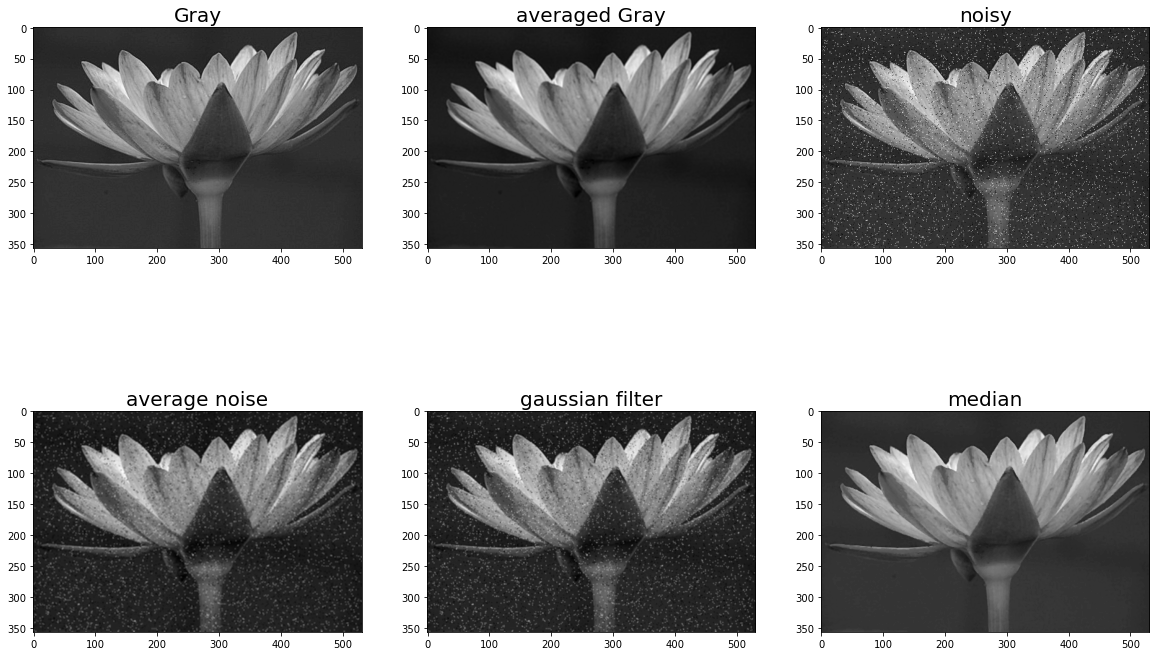

In [9]:
plt.figure(figsize=(20,20))
for i,(img,title) in enumerate(zip(images,title)):
    plot_img(img,title,i+1)